-Importing data , naming columns according to the dataset website , converting it to downloadable CSV .

-Working on the Cleveland data set

In [6]:
import pandas as pd
import numpy as np


file_path = "/content/processed.cleveland.data"
df = pd.read_csv(file_path, header=None)
print(df.head())


     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [7]:
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
    'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
    'ca', 'thal', 'num'
]
df.columns = columns


In [23]:
df.to_csv("heart_disease.csv", index=False)


-Data cleaning :

In [9]:
#replacing
df.replace('?', np.nan, inplace=True)

for col in ['ca', 'thal']:
    df[col] = df[col].astype(float)

#chose to impute values for missing slots
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64':
        df[col].fillna(df[col].mean(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-3911973206.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


In [15]:
#other imports
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

In [13]:
#one-hot encoding
categorical_cols = ['cp', 'restecg', 'slope', 'thal']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [14]:
#standarizing
scaler = StandardScaler()
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

-Data visualization

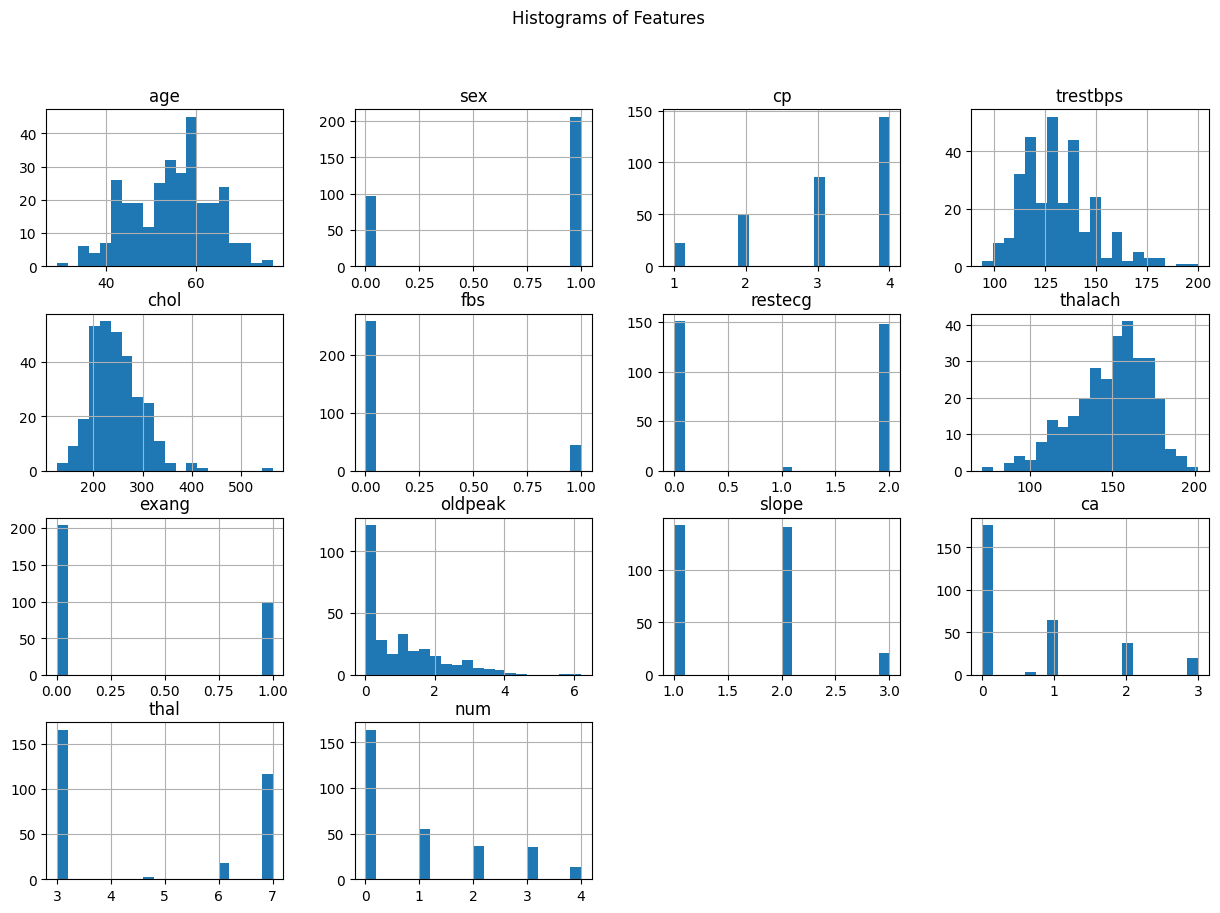

In [16]:
#histogram
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of Features")
plt.show()

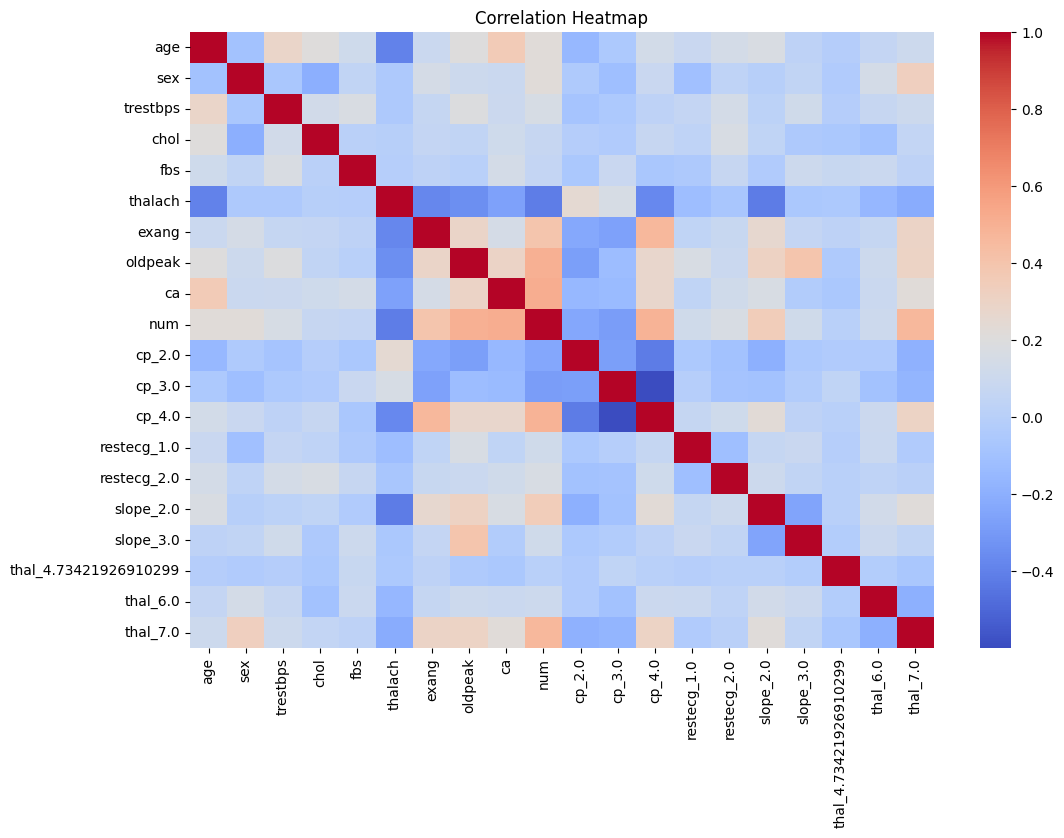

In [18]:
#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

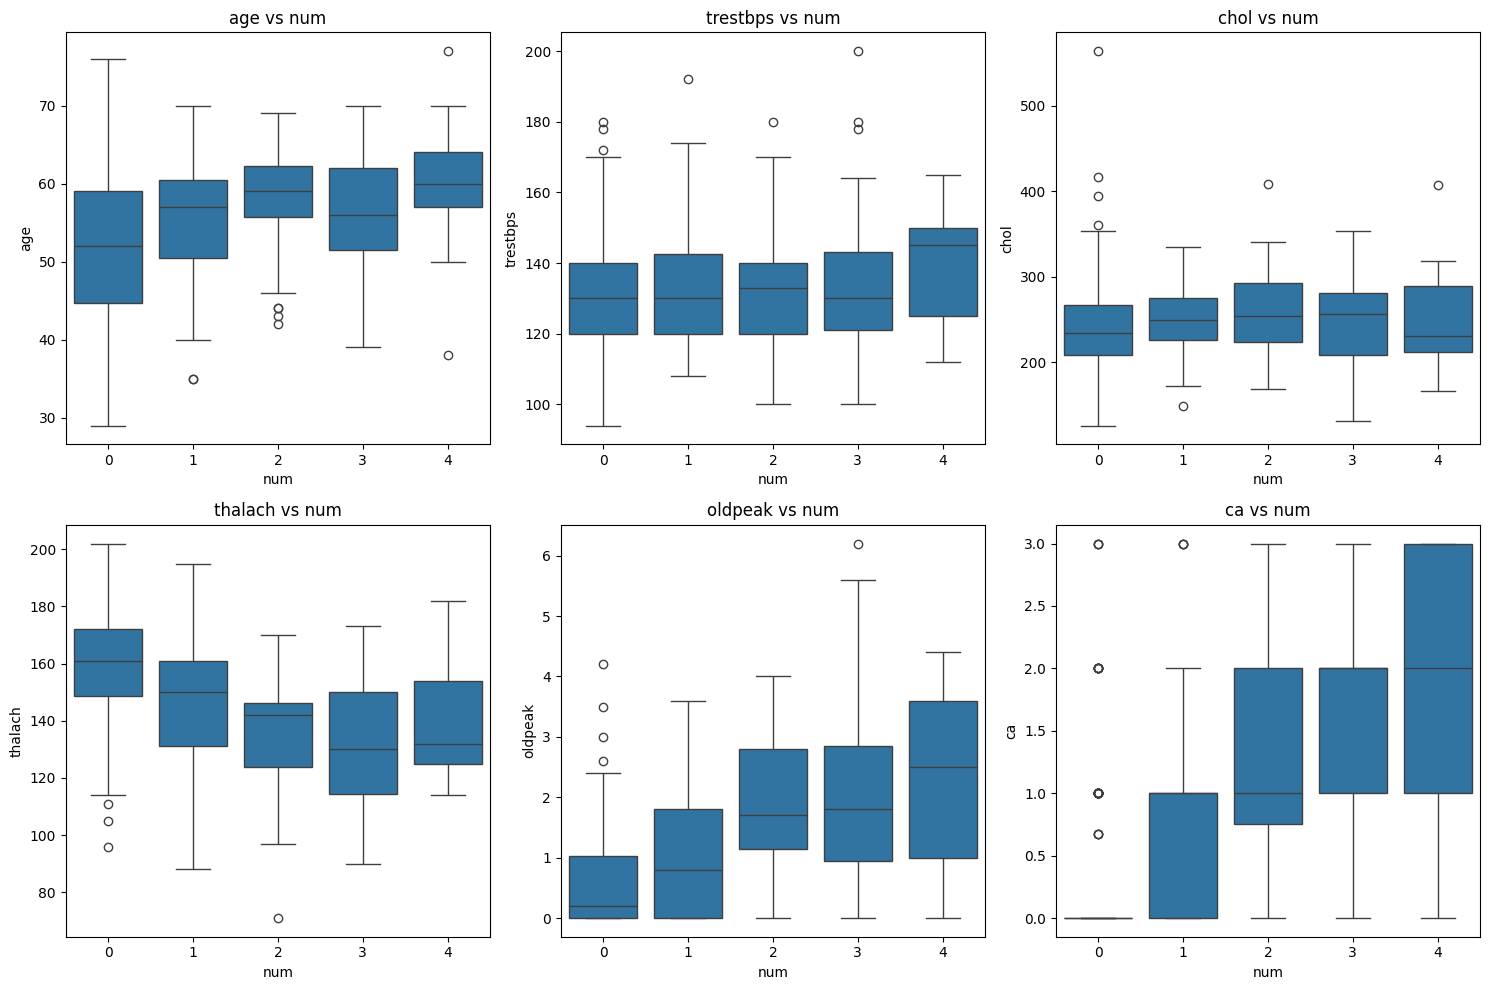

In [20]:
#boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='num', y=col, data=df)
    plt.title(f"{col} vs num")
plt.tight_layout()
plt.show()


In [22]:
print("after preprocessing:", df_encoded.shape)

after preprocessing: (303, 20)
